In [1]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.signal
from mpl_toolkits.mplot3d  import Axes3D

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']  #设置字体为黑米
plt.rcParams['axes.unicode_minus']=False    #设置可以显示负号

In [2]:
f = pyedflib.EdfReader(r"D:\data\FCDataAnalysis\yaoxinyi-sz1.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
record = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    record[i, :] = f.readSignal(i)

In [3]:
sampleFreq = f.getSampleFrequency(1)
signalSam = f.getNSamples()[1]
sigDur = f.getFileDuration()

In [4]:
sampleFreq,signalSam,sigDur,signalSam/sigDur

(999, 901068, 901, 1000.0754716981132)

In [7]:
sampleFreq = 1000

In [65]:
from FCAnalysis import *

In [8]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
c81 = [2.702040, -3.116715, 6.694432]
c82 = [2.861921, -3.375413, 6.688459]

c4 = [1.550549, -3.096932, 7.248825]
c5 = [1.666359, -3.360000, 7.301189]
c6 = [1.873134, -3.690987, 7.311234]
c7 = [1.972259, -3.991350, 7.393227]
c8 = [2.163575, -4.284868, 7.393201]

ez_c = np.array([c81,c82,c4,c5,c6,c7,c8])
# PP  15-16，23-24，42-45
c15 = [2.813373, -3.062771, 4.844960]
c16 = [2.960595, -3.088334, 5.161460]

c23 = [3.991150, -3.267275, 7.376959]
c24 = [4.138372, -3.292838, 7.693459]

c42 = [1.487235, -2.365874, 8.171350]
c43 = [1.518481, -2.674723, 8.355182]
c44 = [1.549333, -2.964988, 8.540124]
c45 = [1.562389, -3.292745, 8.721689]

pz_c = np.array([c15,c16,c23,c24,c42,c43,c44,c45])
# NIZ  28-31，50-52，77-79
c28 = [2.806005, -3.766166, 5.208582]
c29 = [2.810208, -4.114843, 5.238696]
c30 = [2.814411, -4.463519, 5.268810]
c31 = [2.818614, -4.812196, 5.298925]

c50 = [0.061752, -1.536019, 8.735414]
c51 = [0.073662, -1.885596, 8.747822]
c52 = [0.085571, -2.235173, 8.760230]

c77 = [2.107438, -2.082367, 9.217914]
c78 = [2.282581, -2.339542, 9.378181]
c79 = [2.457725, -2.596717, 9.538449]

niz_c = np.array([c28,c29,c30,c31,c50,c51,c52,c77,c78,c79])

In [9]:
zone_c = np.array([ez_c,pz_c,niz_c])

In [17]:
zone_c[2][:,2]

array([5.208582, 5.238696, 5.26881 , 5.298925, 8.735414, 8.747822,
       8.76023 , 9.217914, 9.378181, 9.538449])

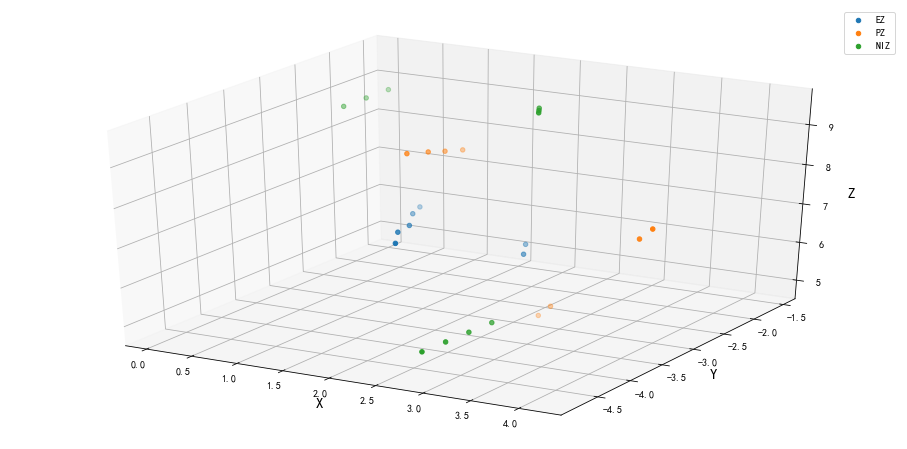

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
label_c=['EZ','PZ','NIZ']

for i in range(len(zone_c)):
    ax.scatter(zone_c[i][:,0],zone_c[i][:,1],zone_c[i][:,2],label=label_c[i])

#ax.scatter(zone_c[2][-3:,0],zone_c[2][-3:,1],zone_c[2][-3:,2],label=label_c[2])
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('Z',fontsize=15)
plt.legend()

In [11]:
#p1与p2是两个三维坐标点
points_center = lambda p1,p2:[(p1[0]+p2[0])/2,(p1[1]+p2[1])/2,(p1[2]+p2[2])/2]
points_dist = lambda p1,p2:((p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2)**0.5

In [23]:
[ez_s[0]]*4

[array([-4306.11972229, -4306.91725032, -4303.72713817, ...,
            0.        ,     0.        ,     0.        ]),
 array([-4306.11972229, -4306.91725032, -4303.72713817, ...,
            0.        ,     0.        ,     0.        ]),
 array([-4306.11972229, -4306.91725032, -4303.72713817, ...,
            0.        ,     0.        ,     0.        ]),
 array([-4306.11972229, -4306.91725032, -4303.72713817, ...,
            0.        ,     0.        ,     0.        ])]

In [12]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
s81_82 = record[81]-record[82]

s4_5 = record[4]-record[5]
s5_6 = record[5]-record[6]
s6_7 = record[6]-record[7]
s7_8 = record[7]-record[8]

ez_s = np.array([s81_82,s4_5,s5_6,s6_7,s7_8])

# PP  15-16，23-24，42-45
s15_16 = record[15]-record[16]
s23_24 = record[23]-record[24]

s42_43 = record[42]-record[43]
s43_44 = record[43]-record[44]
s44_45 = record[44]-record[45]

pz_s = np.array([s15_16,s23_24,s42_43,s43_44,s44_45])

# NIZ  28-31，50-52，77-79
s28_29 = record[28]-record[29]
s29_30 = record[29]-record[30]
s30_31 = record[30]-record[31]

s50_51 = record[50]-record[51]
s51_52 = record[51]-record[52]

s77_78 = record[77]-record[78]
s78_79 = record[78]-record[79]

niz_s = np.array([s28_29,s29_30,s30_31,s50_51,s51_52,s77_78,s78_79])

In [13]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
c81_82 = points_center(c81,c82)

c4_5 = points_center(c4,c5)
c5_6 = points_center(c5,c6)
c6_7 = points_center(c6,c7)
c7_8 = points_center(c7,c8)

ez_ct = np.array([c81_82,c4_5,c5_6,c6_7,c7_8])

# PP  15-16，23-24，42-45
c15_16 = points_center(c15,c16)
c23_24 = points_center(c23,c24)

c42_43 = points_center(c42,c43)
c43_44 = points_center(c43,c44)
c44_45 = points_center(c44,c45)

pz_ct = np.array([c15_16,c23_24,c42_43,c43_44,c44_45])

# NIZ  28-31，50-52，77-79
c28_29 = points_center(c28,c29)
c29_30 = points_center(c29,c30)
c30_31 = points_center(c30,c31)

c50_51 = points_center(c50,c51)
c51_52 = points_center(c51,c52)

c77_78 = points_center(c77,c78)
c78_79 = points_center(c78,c79)

niz_ct = np.array([c28_29,c29_30,c30_31,c50_51,c51_52,c77_78,c78_79])

In [14]:
h2_ez,lag_ez = fc.H2_filter(ez_s[1:],612,22,sampleFreq,maxlag=0.001)

In [33]:
h2_ez

[array([[0.        , 0.51374266, 0.30174503, 0.01774553],
        [0.46903487, 0.        , 0.09212349, 0.13873968],
        [0.2810502 , 0.06493527, 0.        , 0.00132924],
        [0.0547597 , 0.08575571, 0.09958965, 0.        ]]),
 array([[0.        , 0.37848474, 0.12769674, 0.11296622],
        [0.36193596, 0.        , 0.04540019, 0.1159408 ],
        [0.14734663, 0.11956529, 0.        , 0.06659874],
        [0.18870221, 0.07231795, 0.11505938, 0.        ]]),
 array([[0.        , 0.22973381, 0.29802197, 0.14323312],
        [0.21027146, 0.        , 0.06117775, 0.06716585],
        [0.30562966, 0.03874454, 0.        , 0.3002406 ],
        [0.29453579, 0.12891935, 0.36117087, 0.        ]]),
 array([[0.        , 0.18057088, 0.38928433, 0.19800593],
        [0.09207158, 0.        , 0.13873304, 0.06488097],
        [0.36409098, 0.0675504 , 0.        , 0.27203982],
        [0.21621811, 0.13170452, 0.36345774, 0.        ]]),
 array([[0.        , 0.23468893, 0.22083026, 0.10217431],
      

In [46]:
ezc1 = points_dist(c4_5,c5_6),points_dist(c4_5,c6_7),points_dist(c4_5,c7_8),points_dist(c5_6,c6_7),points_dist(c5_6,c7_8),points_dist(c6_7,c7_8)
ezc1

(0.3394323601732011,
 0.6929041573441093,
 1.0259286186996637,
 0.3537826401704871,
 0.6868572143588145,
 0.33308002256627445)

In [29]:
points_dist(c4_5,c81_82),points_dist(c5_6,c81_82),points_dist(c6_7,c81_82),points_dist(c81_82,c7_8)

(1.310731917704189, 1.2168137700495707, 1.2365901401843904, 1.3409362369812743)

In [16]:
ez = []
for i in range(len(ez_s[1:])-1):
    for j in range(i+1,len(ez_s[1:])):
        ez.append(fc.H2_max(h2_ez,lag_ez,i,j)[0])

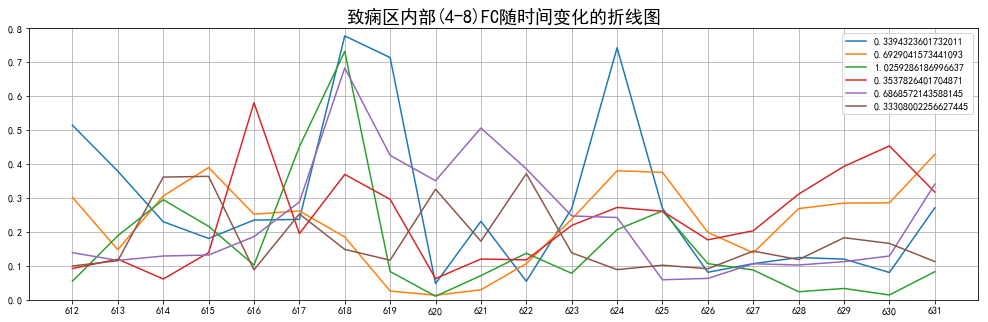

In [112]:
plt.figure(figsize=(17,5))
for i in range(6):
    plt.plot(ez[i],label=ezc1[i])
plt.xticks(np.linspace(0,19,20),np.linspace(612,612+19,20,dtype=int))
plt.legend()
plt.title('致痫区内部(4-8)FC随时间变化的折线图',fontsize=18)
plt.ylim(0,0.8)
plt.grid()

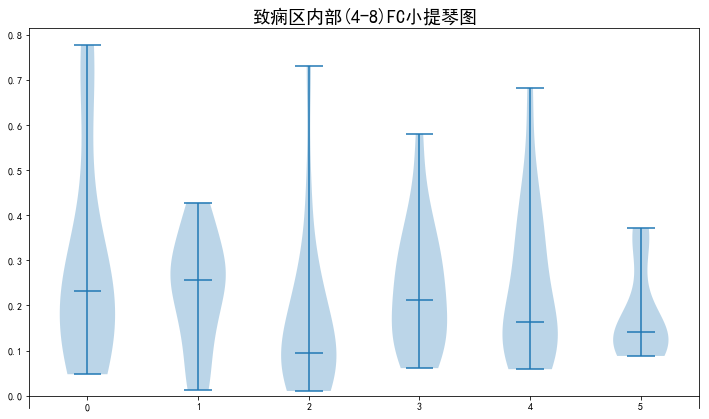

In [39]:
fc.violin(ez,range(6),'致痫区内部(4-8)FC小提琴图')

In [24]:
sampleFreq

1000

In [25]:
ez1_ez2 = fc.H2_bwt_cod([ez_s[0]]*4,ez_s[1:],[ez_ct[0]]*4,ez_ct[1:],612,22,sampleFreq,maxlag=0.001)

In [27]:
ez1_ez2[4]

[1.310731917704189, 1.2168137700495707, 1.2365901401843904, 1.3409362369812743]

In [131]:
def line(llist,label,title):
    plt.figure(figsize=(17,5))
    for i in range(len(llist)):
        plt.plot(llist[i],label=label[i])
    plt.xticks(np.linspace(0,19,20),np.linspace(612,612+19,20,dtype=int))
    plt.legend()
    plt.title(title,fontsize=18)
    plt.grid()
    plt.show()

def violin(vlist,label,title):
    plt.figure(figsize=(16,7))
    vp = plt.violinplot(vlist,showmedians=True) # data里是元素（如data1）还不允许是Series
    #plt.scatter('01',pz[0])
    ax=plt.gca()
    ax.spines['bottom'].set_position(('data',0)) 
    plt.title(title,fontsize=18)
    #color = ['LightSkyBlue','DeepSkyBlue','Cyan','MediumSpringGreen','GreenYellow','Yellow','Orange','Chocolate','LightPink','Violet']
    color=['DeepSkyBlue','DarkTurquoise','MediumSpringGreen','GreenYellow','Yellow','Orange','SandyBrown','LightPink','Violet','BlueViolet']
    i=0
    for pc in vp['bodies']:
        pc.set_facecolor(color[i%10])
        pc.set_edgecolor('black')
        i+=1
    plt.xticks(range(1,len(label)+1),label)  # 只能这么设置label
    #plt.yticks([i/10 for i in range(0,11)])
    plt.grid()
    #plt.show()

In [36]:
len(ez1_ez2[1][1][0])

20

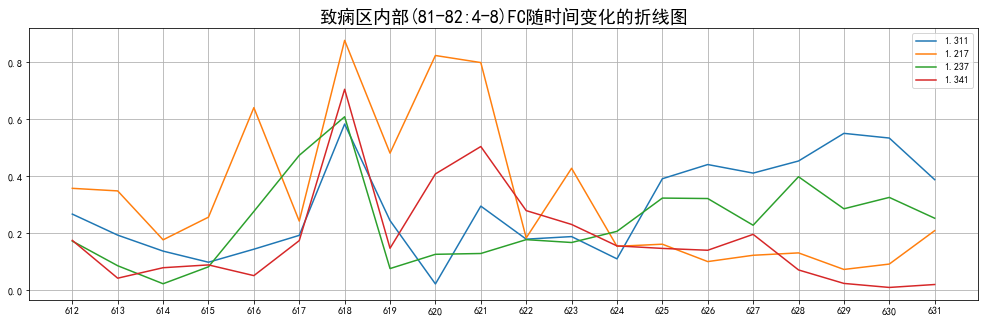

In [138]:
line([i[0] for i in ez1_ez2[1]],np.round(ez1_ez2[4],3),'致痫区内部(81-82:4-8)FC随时间变化的折线图')

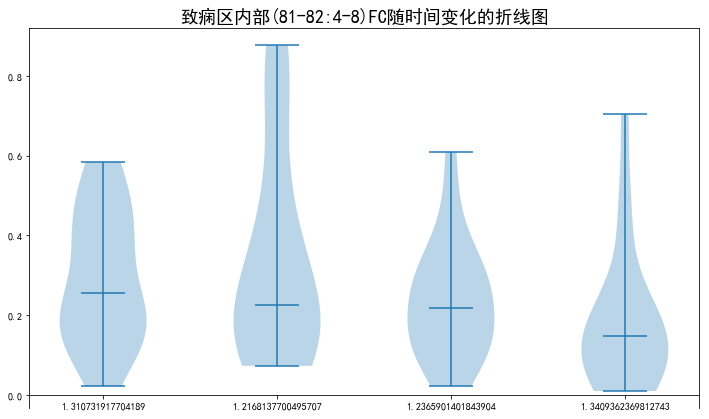

In [43]:
fc.violin([i[0] for i in ez1_ez2[1]],ez1_ez2[4],'致痫区内部(81-82:4-8)FC随时间变化的折线图')

In [60]:
ezl1 = {'ez':[ez[5],ez[0],ez[3],ez[4],ez[1]],'dist':[ezc1[5],ezc1[0],ezc1[3],ezc1[4],ezc1[1]]}
ezm1 = {'ez':[ez[2],ez1_ez2[1][1][0],ez1_ez2[1][2][0],ez1_ez2[1][0][0],ez1_ez2[1][3][0]],'dist':[ezc1[2],ez1_ez2[4][1],ez1_ez2[4][2],ez1_ez2[4][0],ez1_ez2[4][3]]}

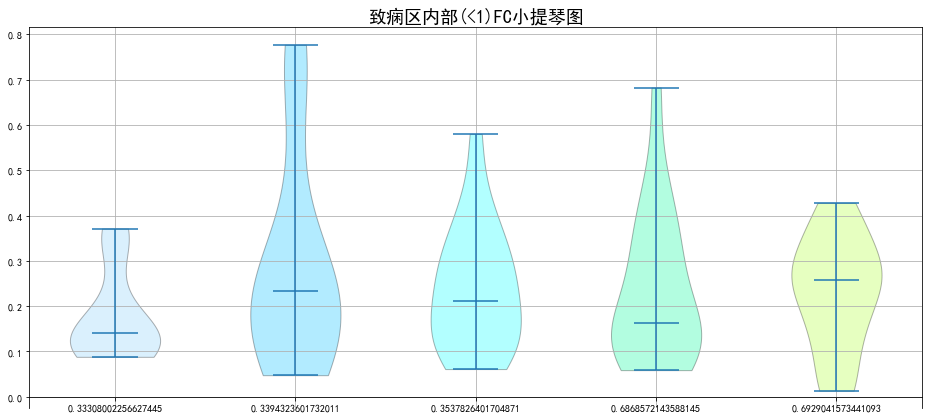

In [125]:
violin(ezl1['ez'],ezl1['dist'],'致痫区内部(<1)FC小提琴图')

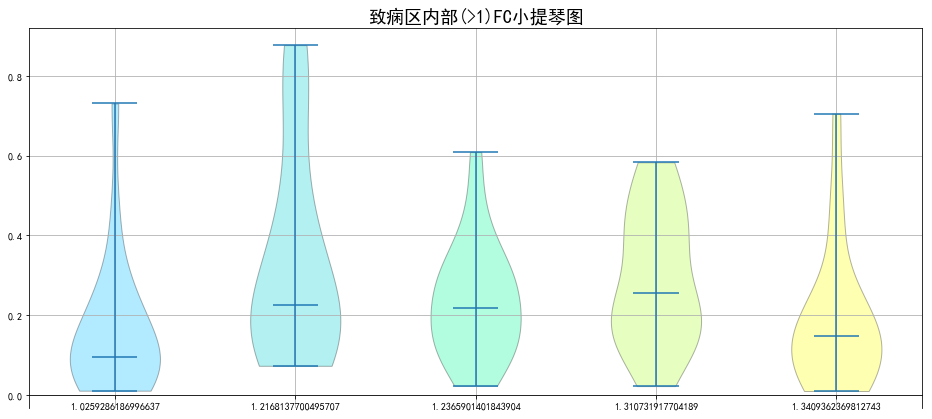

In [159]:
violin(ezm1['ez'],ezm1['dist'],'致痫区内部(>1)FC小提琴图')

In [68]:
def H2_cod(zone1,zone2,cod1,cod2,start_time,duration,sampleFreq,slideWindow=2,step=1,maxlag=0.1,L=7,HP=0,LP=0):
    h2_bwt=[]
    h2_bwt_max=[]
    h2_bwt_median=[]
    codistance = []
    lz2 = len(zone2)
    for i in range(len(zone1)):
        xi = i*lz2
        for j in range(lz2):
            yi = xi+j
            h2_bwt.append(H2_filter([zone1[i],zone2[j]],start_time,duration,sampleFreq,slideWindow,step,maxlag,L,HP,LP))
            h2_bwt_max.append(H2_max(h2_bwt[yi][0],h2_bwt[yi][1]))
            h2_bwt_median.append(np.median(h2_bwt_max[yi][0]))
            codistance.append(points_dist(cod1[i],cod2[j]))
    return h2_bwt,h2_bwt_max,h2_bwt_median,np.median(h2_bwt_median),codistance

def h2_median(h2_value):
    sub_median=[]
    for i in range(len(h2_value)):
        sub_median.append(np.median(h2_value[i]))
    return np.median(sub_median)

In [76]:
h2_median(ezl1['ez']),h2_median(ezm1['ez']),(h2_median(ezl1['ez'])+h2_median(ezm1['ez']))/2

(0.21110855378047172, 0.21751279416949992, 0.21431067397498582)

In [69]:
# pz_s = np.array([s15_16,s23_24,s42_43,s43_44,s44_45])
pz_in = H2_cod(pz_s[:2],pz_s[2:],pz_ct[:2],pz_ct[2:],612,22,sampleFreq,maxlag=0.001)

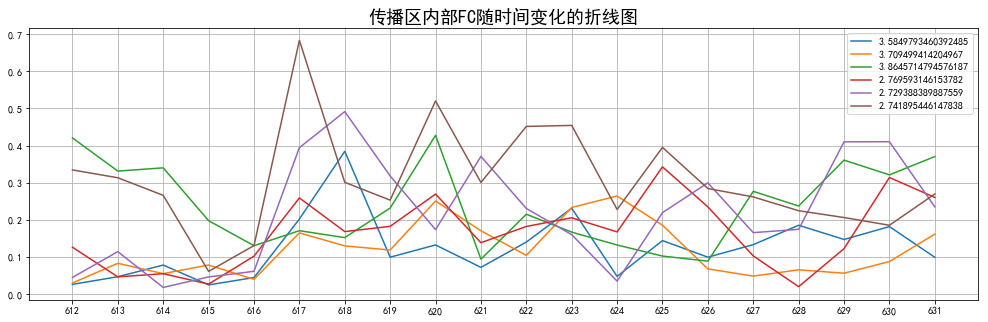

In [78]:
line([i[0] for i in pz_in[1]],pz_in[4],'传播区内部FC随时间变化的折线图')

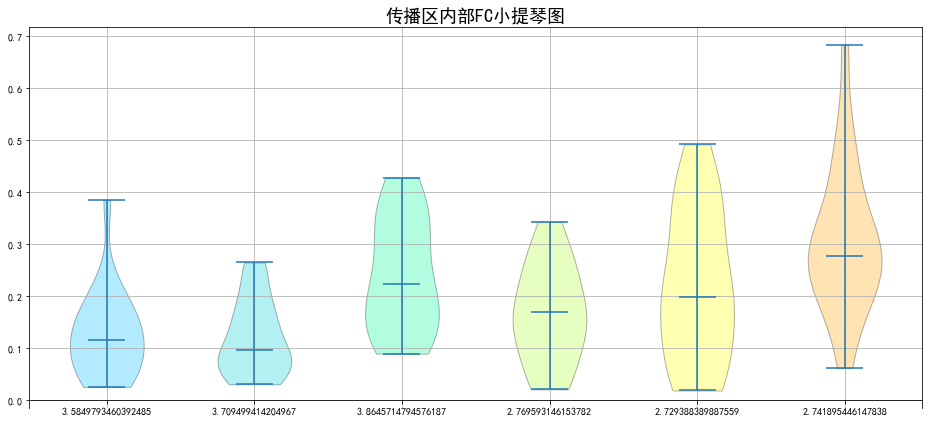

In [158]:
violin([i[0] for i in pz_in[1]],pz_in[4],'传播区内部FC小提琴图')

In [77]:
pz_in[3]

0.18240290779562432

In [80]:
# niz_s = np.array([s28_29,s29_30,s30_31,s50_51,s51_52,s77_78,s78_79])
niz_in = H2_cod(niz_s[1:5],niz_s[5:],niz_ct[1:5],niz_ct[5:],612,22,sampleFreq,maxlag=0.001)

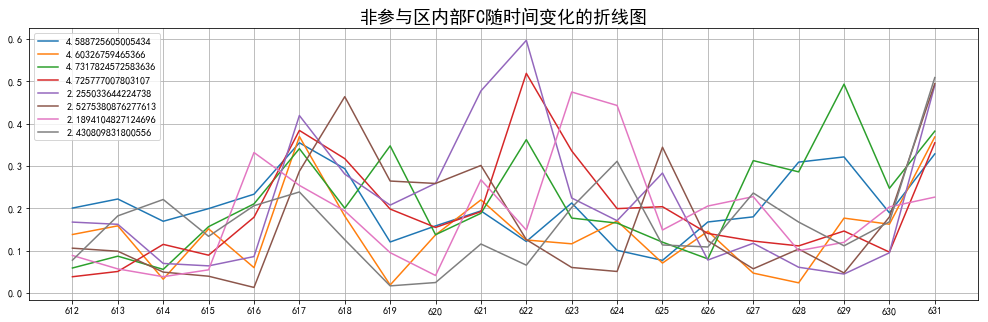

In [81]:
line([i[0] for i in niz_in[1]],niz_in[4],'非参与区内部FC随时间变化的折线图')

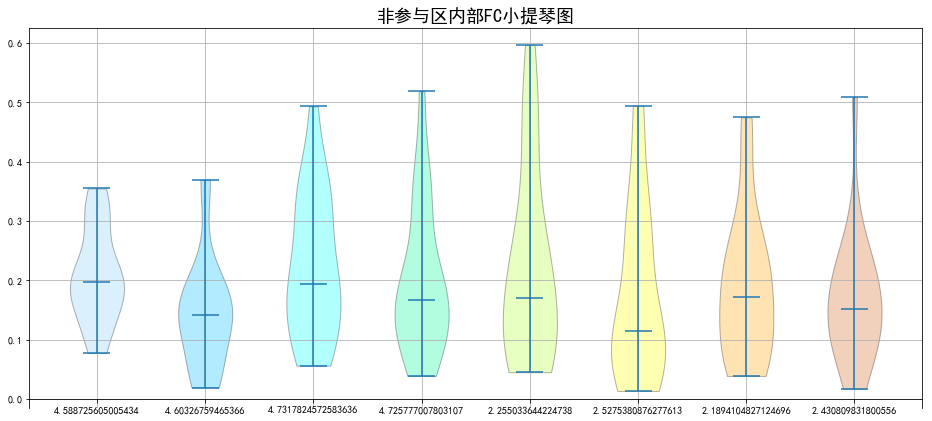

In [127]:
violin([i[0] for i in niz_in[1]],niz_in[4],'非参与区内部FC小提琴图')

In [84]:
niz_in[3]

0.16810261379153554

In [87]:
ez_pz = H2_cod(ez_s[::2],pz_s[[0,1,4]],ez_ct[::2],pz_ct[[0,1,4]],612,22,sampleFreq,maxlag=0.001) #0，2,4

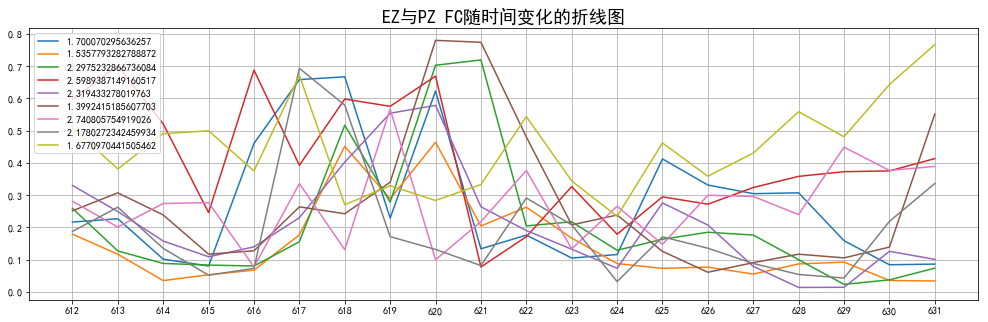

In [88]:
line([i[0] for i in ez_pz[1]],ez_pz[4],'EZ与PZ FC随时间变化的折线图')

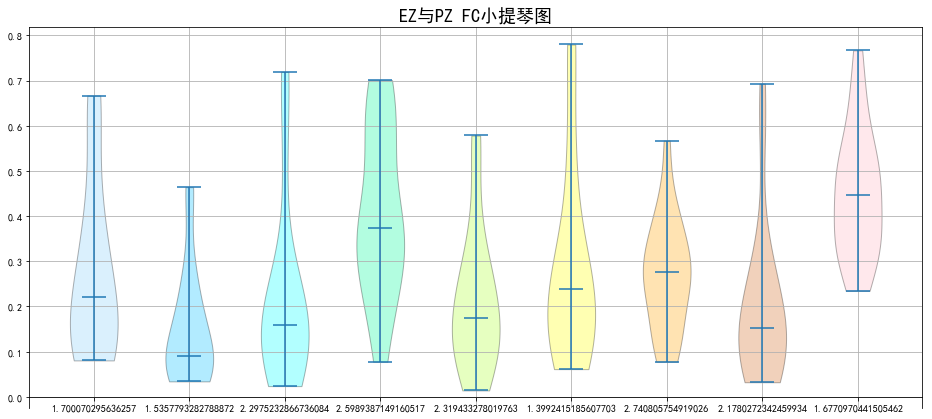

In [129]:
violin([i[0] for i in ez_pz[1]],ez_pz[4],'EZ与PZ FC小提琴图')

In [90]:
ez_pz[3]

0.22186819291950383

In [160]:
ez_niz = H2_cod(ez_s[::2],niz_s[::3],ez_ct[::2],niz_ct[::3],612,22,sampleFreq,maxlag=0.001) #0，2,4

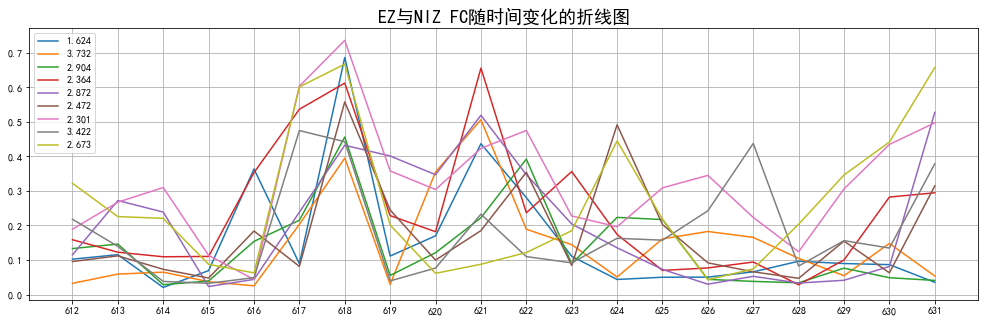

In [161]:
line([i[0] for i in ez_niz[1]],np.round(ez_niz[4],3),'EZ与NIZ FC随时间变化的折线图')

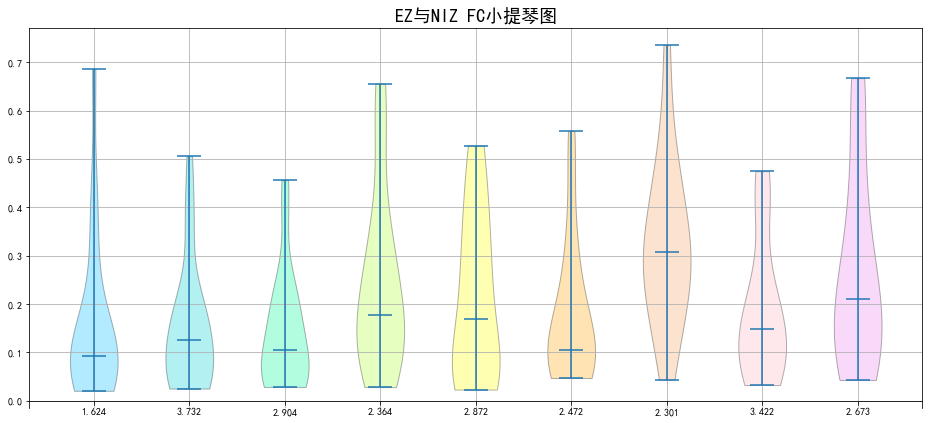

In [162]:
violin([i[0] for i in ez_niz[1]],np.round(ez_niz[4],3),'EZ与NIZ FC小提琴图')

In [165]:
ez_niz[3]

0.1477863719834101

In [155]:
def h2_suit(zone1,zone2,cod1,cod2,label,start_time,duration,sampleFreq,slideWindow=2,step=1,maxlag=0.1,L=7,HP=0,LP=0):
    h2_bwt=[]
    h2_bwt_max=[]
    h2_bwt_median=[]
    h2_per_max = []
    codistance = []
    lz2 = len(zone2)
    for i in range(len(zone1)):
        xi = i*lz2
        for j in range(lz2):
            yi = xi+j
            h2_bwt.append(H2_filter([zone1[i],zone2[j]],start_time,duration,sampleFreq,slideWindow,step,maxlag,L,HP,LP))
            h2_bwt_max.append(H2_max(h2_bwt[yi][0],h2_bwt[yi][1]))
            a,b=np.percentile(h2_bwt_max[yi][0],[50,100])
            h2_bwt_median.append(a)
            h2_per_max.append(b)
            codistance.append(points_dist(cod1[i],cod2[j]))
    line([i[0] for i in h2_bwt_max],np.round(codistance,3),label+' FC随时间变化的折线图')
    violin([i[0] for i in h2_bwt_max],np.round(codistance,3),label+' FC小提琴图')
    for i in range(len(h2_bwt_median)):
        plt.text(i+1,h2_per_max[i]+0.01,np.round(h2_bwt_median[i],3),ha='center',va='bottom',fontsize=15) # ha：水平对齐，va：垂直对齐
    return h2_bwt,h2_bwt_max,h2_bwt_median,np.median(h2_bwt_median),codistance

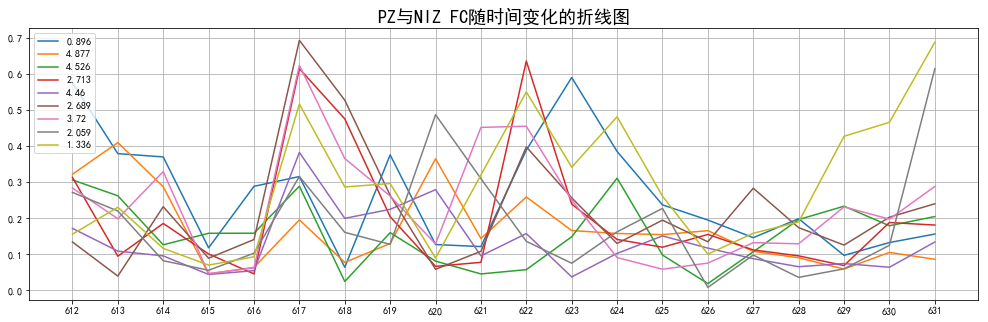

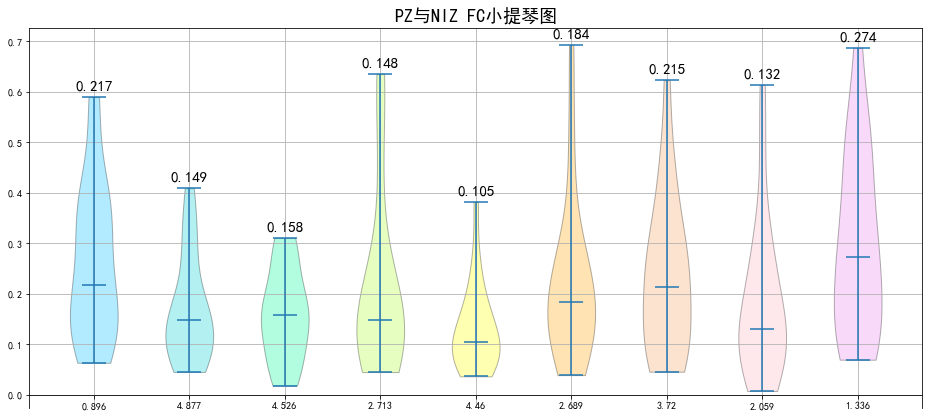

In [163]:
pz_niz = h2_suit(pz_s[[0,1,4]],niz_s[::3],pz_ct[[0,1,4]],niz_ct[::3],'PZ与NIZ',612,22,sampleFreq,maxlag=0.001) #0，2,4

In [164]:
pz_niz[3],np.where(pz_niz[2]==pz_niz[3])                           

(0.1580579762043423, (array([2], dtype=int64),))